Classification on MNIST Using CNN-GP:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision as tv
from networks import cnn,res_cnn

In [2]:
cnn3=cnn(3)
res3=res_cnn(3)

In [3]:
def generate_data(n_samples,t_samples,classes=10):
    X=train.data[:n_samples].view(n_samples,1,28,28)/255
    Y=train.targets[:n_samples]
    Y_mat=-1*torch.ones((n_samples,classes))
    for i in range(n_samples):
        Y_mat[i,Y[i]]=1

    X_prime=test.data[:t_samples].view(t_samples,1,28,28)/255
    Y_t=test.targets[:t_samples]
    
    return X,Y_mat,X_prime,Y_t

In [4]:
def model_acc(model,n_samples,t_samples,classes=10):
    accuracy=np.zeros((len(n_samples),len(t_samples)))
    for j in range(len(n_samples)):
        for i in range(len(t_samples)):
            X,Y_mat,X_prime,Y_t=generate_data(n_samples[j],t_samples[i],classes)
            
            Kxx=model(X)

            Kxpx=model(X_prime,X)

            preds=torch.matmul(Kxpx,torch.matmul(torch.linalg.inv(Kxx),Y_mat))
            _,pred_labels=torch.max(preds,1)
            acc=sum(pred_labels.cpu()==Y_t)/t_samples[i]
            accuracy[j,i]=acc
    return accuracy

In [5]:
train=tv.datasets.MNIST('./mnist_train',train=True,download=True)
test=tv.datasets.MNIST('./mnist_test',train=False,download=True)

In [6]:
n_samples=np.arange(100,310,10)
t_samples=np.arange(100,610,50)
X,Y=np.meshgrid(n_samples,t_samples)
np.save('./X.npy',X)
np.save('./Y.npy',Y)

In [7]:
models=[cnn3]
ind=['cnn']

In [38]:
for i in range(len(models)):
    accuracy=model_acc(models[i],n_samples,t_samples)
    np.save(f'./Acc{ind[i]}.npy',accuracy)

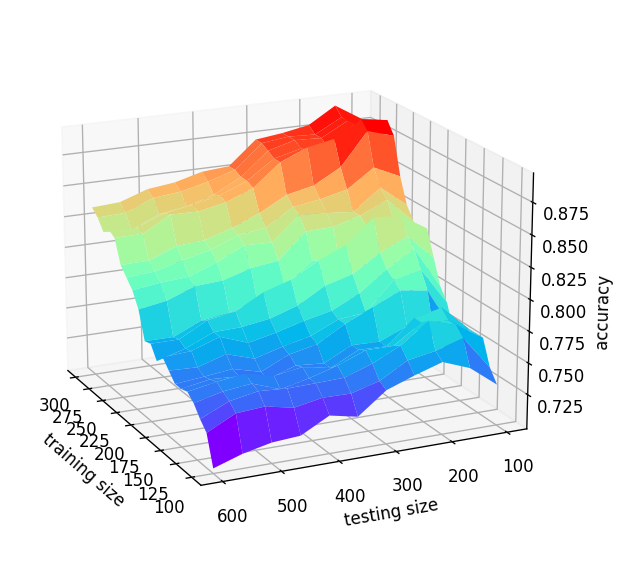

In [33]:
%matplotlib inline
fig=plt.figure(figsize=(8,6),dpi=120)
for i in range(len(ind)):
    ax3=fig.add_subplot(len(models),1,i+1,projection='3d')
    accuracy=np.load(f'./Acc{ind[i]}.npy')
    #print(f'accuracy total: {accuracy.sum(1).sum(0)/np.multiply(*accuracy.shape)*100:.4f}%')
    ax3.plot_surface(X,Y,accuracy.T,cmap='rainbow',label=f'{ind[i]}')
    ax3.view_init(18,155)
    ax3.set_xlabel('training size')
    ax3.set_ylabel('testing size')
    ax3.set_zlabel('accuracy')
plt.savefig(f'./train_test_cnn_gp')

Classification of Resdual CNN-GP

In [5]:
var_bias = 4.69
var_weight = 7.27

In [43]:
ind=[3,4,5,6,7,8,9,10,11,12,13,14]
models=[res_cnn(i) for i in ind]

n_samples=np.arange(100,210,10)
t_samples=np.arange(100,510,50)
X,Y=np.meshgrid(n_samples,t_samples)
np.save('./X_res.npy',X)
np.save('./Y_res.npy',Y)

In [44]:
for i in range(len(models)):
    try:
        np.load(f'./A_res_cnn_gp{ind[i]}.npy')
    except:
        accuracy=model_acc(models[i],n_samples,t_samples)
        np.save(f'./A_res_cnn_gp{ind[i]}.npy',accuracy)

accuracy total: 90.4479%
accuracy total: 90.8063%
accuracy total: 90.9743%
accuracy total: 91.3460%
accuracy total: 91.3414%
accuracy total: 91.4748%
accuracy total: 91.6048%
accuracy total: 91.6319%
accuracy total: 10.9678%
accuracy total: 10.9678%
accuracy total: 10.9678%
accuracy total: 10.9678%


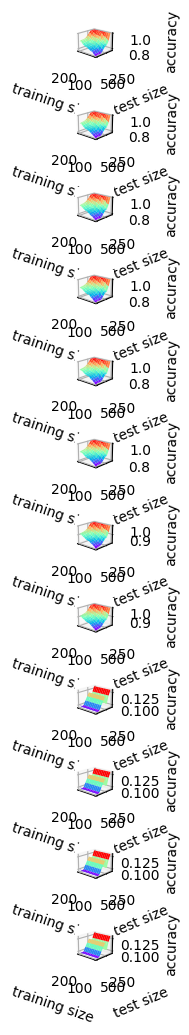

In [45]:
fig=plt.figure(figsize=(6,10),dpi=100)
for i in range(len(ind)):
    ax3=fig.add_subplot(len(ind),1,i+1,projection='3d')
    accuracy=np.load(f'./A_res_cnn_gp{ind[i]}.npy')
    print(f'accuracy total: {accuracy.sum(1).sum(0)/np.multiply(*accuracy.shape)*100:.4f}%')
    ax3.plot_surface(X.T,Y.T,accuracy,cmap='rainbow',label=f'{ind[i]}')
    ax3.view_init(18,132)
    ax3.set_xlabel('training size')
    ax3.set_ylabel('test size')
    ax3.set_zlabel('accuracy')
plt.savefig(f'./train_test_cnn_gp')
plt.tight_layout()